# Data Cleaning and Preprocessing: SeeClickFix & WebCrowd25k

This notebook performs basic exploratory data analysis (EDA) and minimal cleaning/preprocessing for:
1. **SeeClickFix Public Service Requests** - Civic issue reporting dataset
2. **WebCrowd25k** - Crowdsourcing relevance judgment dataset

**Research Context**: Leadership Style Impact on Trustworthiness in Mobile Crowdsensing Projects

## 1. Setup and Imports

In [1]:
# Standard library
import os
import warnings
from pathlib import Path
from datetime import datetime

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")
print(f"✓ Working directory: {os.getcwd()}")

✓ Libraries imported successfully
✓ Working directory: d:\Noor_work\Master\UAEU\RA\sensing


## 2. Data Loading

Load both datasets with robust parsing to handle embedded newlines and special characters.

In [2]:
# Define data paths
# For Google Colab, you'll need to upload files or mount Drive
# Adjust these paths based on your setup

DATA_DIR = Path('.')
SEECLICKFIX_PATH = DATA_DIR / 'SeeClickFix_Public_Service_Requests.csv'
WEBCROWD_DIR = DATA_DIR / 'webcrowd25k' / 'webcrowd25k'
CROWD_JUDGEMENTS_PATH = WEBCROWD_DIR / 'crowd_judgements.csv'
GOLD_JUDGEMENTS_PATH = WEBCROWD_DIR / 'gold_judgements.txt'

print("Data paths:")
print(f"  SeeClickFix: {SEECLICKFIX_PATH.exists()}")
print(f"  Crowd Judgements: {CROWD_JUDGEMENTS_PATH.exists()}")
print(f"  Gold Judgements: {GOLD_JUDGEMENTS_PATH.exists()}")

Data paths:
  SeeClickFix: True
  Crowd Judgements: True
  Gold Judgements: True


### 2.1 Load SeeClickFix Dataset

In [3]:
# Load SeeClickFix with robust CSV parsing
# Using quoting and escapechar to handle embedded quotes and newlines
print("Loading SeeClickFix dataset...")
df_seeclickfix = pd.read_csv(
    SEECLICKFIX_PATH,
    quoting=1,  # QUOTE_ALL
    escapechar='\\',
    low_memory=False
)

print(f"✓ Loaded SeeClickFix: {df_seeclickfix.shape[0]:,} rows × {df_seeclickfix.shape[1]} columns")
print(f"\nColumn names: {list(df_seeclickfix.columns)}")
print(f"\nFirst few rows:")
df_seeclickfix.head(3)

Loading SeeClickFix dataset...
✓ Loaded SeeClickFix: 7,121 rows × 20 columns

Column names: ['X', 'Y', 'OBJECTID', 'GlobalID', 'id', 'summary', 'description', 'status', 'address', 'category', 'source', 'agency', 'comments_count', 'image_url', 'image_square_url', 'url', 'created_at', 'acknowledged_at', 'closed_at', 'reopened_at']

First few rows:


,X,Y,OBJECTID,GlobalID,id,summary,description,status,address,category,source,agency,comments_count,image_url,image_square_url,url,created_at,acknowledged_at,closed_at,reopened_at
0,-8.799932e+06,4.289799e+06,6307288,47826322-388e-447d-bb67-80690b9015e8,8313237,"HURRICANE ISAIAS - Tree Down blocking one lane, NO POWERLINE",NaN,closed,"514 Hillsborough St Chapel Hill, NC, 27514, USA",HURRICANE ISAIAS - Powerline(s) down only,Request Form,Hurricane Isaias CH Response Team,4,NaN,NaN,https://crm.seeclickfix.com/#/organizations/1102/issues/8313237,2020/08/03 18:30:39+00,2020/08/03 19:02:46+00,2020/08/03 19:32:57+00,NaN
1,-8.799400e+06,4.286181e+06,6307302,0d37bc0f-57c0-4d3f-8536-9371a4946ea8,8313328,"Unmaintained Vegetation, Right of Way",wood & brush pile needs to be picked up,closed,"618 Morgan Creek Rd Chapel Hill, NC 27517, USA",Solid Waste - Large Yard Waste Piles - Collection,Android,"Chapel Hill, NC",9,https://seeclickfix.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZS...,https://seeclickfix.com/rails/active_storage/representations/redirect/eyJfcmFpbHMiOnsibWVzc2FnZS...,https://crm.seeclickfix.com/#/organizations/1102/issues/8313328,2020/08/03 19:00:50+00,NaN,2020/08/14 13:27:02+00,2020/08/07 17:23:50+00
2,-8.797190e+06,4.291899e+06,6307316,f2009ac0-d023-4db6-ad8f-591d9734183d,8306024,Traffic Signal,Could you check the cycle to cross the Eastgate driveway on Franklin Street with the pedestrian ...,closed,"1800 E Franklin St Chapel Hill NC 27514, United States",Traffic Signal,iPhone,Traffic Signals - Chapel Hill & Carrboro,4,NaN,NaN,https://crm.seeclickfix.com/#/organizations/1102/issues/8306024,2020/08/02 13:06:33+00,2020/08/03 20:23:52+00,2020/08/10 17:51:02+00,NaN


### 2.2 Load WebCrowd Crowd Judgements

In [4]:
# Load crowd judgements CSV
# Note: rationale column contains newlines, so we need robust parsing
print("Loading WebCrowd crowd judgements...")
df_crowd = pd.read_csv(
    CROWD_JUDGEMENTS_PATH,
    quoting=1,  # QUOTE_ALL
    escapechar='\\',
    low_memory=False
)

print(f"✓ Loaded crowd judgements: {df_crowd.shape[0]:,} rows × {df_crowd.shape[1]} columns")
print(f"\nColumn names: {list(df_crowd.columns)}")
print(f"\nFirst few rows:")
df_crowd.head(3)

Loading WebCrowd crowd judgements...
✓ Loaded crowd judgements: 25,119 rows × 12 columns

Column names: ['wid', 'feedback', 'url', 'mapping', 'label', 'start', 'tid', 'design', 'rationale', 'duration', 'did', 'ID']

First few rows:


,wid,feedback,url,mapping,label,start,tid,design,rationale,duration,did,ID
0,wid#0,{},http://ir.ischool.utexas.edu/relevance/clueweb12/clueweb12-0401wb-51-01278.html,rlt3AvBHSs,1.0,Mon Apr 24 10:16:08 PDT 2017,267.0,NIST,Jaci Velasquez lyrics,298.0,clueweb12-0401wb-51-01278,0
1,wid#1,good,http://ir.ischool.utexas.edu/relevance/clueweb12/clueweb12-0401wb-51-01278.html,4qaUWlHcqH,0.0,Mon Apr 24 09:57:44 PDT 2017,267.0,NIST,Jaci Velasquez lyrics\n\nSort by album · Sort by song title\n\nBeauty Has Grace\n\nI'm Not Loo...,54.0,clueweb12-0401wb-51-01278,1
2,wid#2,{},http://ir.ischool.utexas.edu/relevance/clueweb12/clueweb12-0401wb-51-01278.html,rn12FoCKPi,0.0,Mon Apr 24 10:11:02 PDT 2017,267.0,NIST,He's My Savior lyrics,58.0,clueweb12-0401wb-51-01278,2


### 2.3 Load WebCrowd Gold Judgements

In [5]:
# Load gold judgements (space-delimited text file)
# Format: topic_id unused_column document_id gold_judgement
print("Loading WebCrowd gold judgements...")
df_gold = pd.read_csv(
    GOLD_JUDGEMENTS_PATH,
    sep='\s+',  # Use regex to handle one or more spaces as a delimiter
    header=None,
    names=['topic_id', 'unused_col', 'document_id', 'gold_judgement'],
    engine='python'
)

# Drop the unused column as per readme
df_gold = df_gold.drop(columns=['unused_col'])

print(f"✓ Loaded gold judgements: {df_gold.shape[0]:,} rows × {df_gold.shape[1]} columns")
print(f"\nColumn names: {list(df_gold.columns)}")
print(f"\nFirst few rows:")
df_gold.head(10)

Loading WebCrowd gold judgements...
✓ Loaded gold judgements: 14,432 rows × 3 columns

Column names: ['topic_id', 'document_id', 'gold_judgement']

First few rows:


,topic_id,document_id,gold_judgement
0,251,clueweb12-0000tw-34-04382,1
1,251,clueweb12-0000wb-01-01965,2
2,251,clueweb12-0000wb-01-01996,1
3,251,clueweb12-0000wb-09-15706,0
4,251,clueweb12-0000wb-27-20095,1
5,251,clueweb12-0000wb-27-20097,1
6,251,clueweb12-0000wb-48-08902,1
7,251,clueweb12-0000wb-58-28745,2
8,251,clueweb12-0000wb-90-32205,2
9,251,clueweb12-0000wb-90-35684,1


## 3. Basic Exploratory Data Analysis

Examine data quality, missingness, distributions, and key patterns.

### 3.1 SeeClickFix EDA

In [6]:
print("=" * 80)
print("SEECLICKFIX DATASET - BASIC STATISTICS")
print("=" * 80)

print(f"\nDataset Shape: {df_seeclickfix.shape}")
print(f"\nData Types:\n{df_seeclickfix.dtypes}")
print(f"\nMissing Values:\n{df_seeclickfix.isnull().sum().sort_values(ascending=False)}")
print(f"\nMissing Percentage:\n{(df_seeclickfix.isnull().sum() / len(df_seeclickfix) * 100).round(2).sort_values(ascending=False)}")

# Check for duplicates
print(f"\nDuplicate rows (all columns): {df_seeclickfix.duplicated().sum()}")
if 'id' in df_seeclickfix.columns:
    print(f"Duplicate IDs: {df_seeclickfix['id'].duplicated().sum()}")
if 'GlobalID' in df_seeclickfix.columns:
    print(f"Duplicate GlobalIDs: {df_seeclickfix['GlobalID'].duplicated().sum()}")

SEECLICKFIX DATASET - BASIC STATISTICS

Dataset Shape: (7121, 20)

Data Types:
X                   float64
Y                   float64
OBJECTID              int64
GlobalID             object
id                    int64
summary              object
description          object
status               object
address              object
category             object
source               object
agency               object
comments_count        int64
image_url            object
image_square_url     object
url                  object
created_at           object
acknowledged_at      object
closed_at            object
reopened_at          object
dtype: object

Missing Values:
reopened_at         6990
acknowledged_at     4929
image_url           4223
image_square_url    4223
closed_at            296
description          238
Y                      0
X                      0
GlobalID               0
OBJECTID               0
summary                0
id                     0
agency                 0
sourc

In [7]:
# Pattern 1: Are missing values correlated with status?
# Example: Do "closed" issues have more complete data than "open" ones?
df_seeclickfix.groupby('status')['description'].apply(lambda x: x.isnull().sum())

# Pattern 2: Are missing values correlated with agency?
# Example: Do some agencies have better data quality than others?
df_seeclickfix.groupby('agency')['acknowledged_at'].apply(lambda x: x.isnull().sum())

# Pattern 3: Are missing values correlated with source?
# Example: Do mobile app reports have different completeness than web forms?
df_seeclickfix.groupby('source')['description'].apply(lambda x: x.isnull().sum())


source
Android           15
Other             50
Portal            37
Request Form      15
Web - Desktop      6
Web - Mobile      10
iPhone           105
Name: description, dtype: int64

In [8]:
# 1. Get percentages (not just counts) to account for different volumes
total_by_source = df_seeclickfix.groupby('source').size()
missing_by_source = df_seeclickfix.groupby('source')['description'].apply(lambda x: x.isnull().sum())
missing_percentage = (missing_by_source / total_by_source * 100).round(2)
print("Missing description percentage by source:")
print(missing_percentage.sort_values(ascending=False))

# 2. Check if iPhone users provide shorter summaries when description is missing
iphone_missing_desc = df_seeclickfix[(df_seeclickfix['source'] == 'iPhone') & 
                                      (df_seeclickfix['description'].isnull())]
if 'summary' in df_seeclickfix.columns:
    print(f"\niPhone reports with missing description:")
    print(f"  Total: {len(iphone_missing_desc)}")
    print(f"  Have summary: {(iphone_missing_desc['summary'].notna()).sum()}")

# 3. Check if missing descriptions correlate with other fields
print("\nMissing description by source - full breakdown:")
df_seeclickfix.groupby('source').agg({
    'description': lambda x: x.isnull().sum(),
    'summary': lambda x: x.notna().sum(),  # How many have summary
    'id': 'count'  # Total reports per source
})

Missing description percentage by source:
source
iPhone           5.56
Web - Mobile     5.24
Portal           3.44
Other            2.55
Android          2.27
Web - Desktop    1.69
Request Form     1.51
dtype: float64

iPhone reports with missing description:
  Total: 105
  Have summary: 105

Missing description by source - full breakdown:


,description,summary,id
source,,,
Android,15,662,662
Other,50,1959,1959
Portal,37,1075,1075
Request Form,15,992,992
Web - Desktop,6,354,354
Web - Mobile,10,191,191
iPhone,105,1888,1888


In [9]:
# Key categorical distributions
print("\n" + "=" * 80)
print("CATEGORICAL DISTRIBUTIONS")
print("=" * 80)

if 'status' in df_seeclickfix.columns:
    print(f"\nStatus Distribution:\n{df_seeclickfix['status'].value_counts()}")
    
if 'category' in df_seeclickfix.columns:
    print(f"\nTop 10 Categories:\n{df_seeclickfix['category'].value_counts().head(10)}")
    
if 'agency' in df_seeclickfix.columns:
    print(f"\nTop 10 Agencies:\n{df_seeclickfix['agency'].value_counts().head(10)}")
    
if 'source' in df_seeclickfix.columns:
    print(f"\nSource Distribution:\n{df_seeclickfix['source'].value_counts()}")


CATEGORICAL DISTRIBUTIONS

Status Distribution:
status
closed          6822
open             233
accepted          53
in_progress       10
needs_review       3
Name: count, dtype: int64

Top 10 Categories:
category
Dead Animal                              850
Traffic Sign Down                        657
Unmaintained Vegetation, Right of Way    635
Traffic Signal                           569
Pothole                                  477
Sidewalk Repair                          416
Traffic Safety/Miscellaneous             401
Solid Waste - Yard Waste Dumpster        345
Park Maintenance                         281
Blocked Storm Drain                      275
Name: count, dtype: int64

Top 10 Agencies:
agency
Chapel Hill, NC                             6157
Traffic Signals - Chapel Hill & Carrboro     569
Hurricane Florence CH Response Team          126
Hurricane Michael CH Response Team           111
Winter Storm Diego CH Response Team           65
Adverse Event CH Response             

In [10]:
# Numeric columns summary
print("\n" + "=" * 80)
print("NUMERIC COLUMNS SUMMARY")
print("=" * 80)

numeric_cols = df_seeclickfix.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df_seeclickfix[numeric_cols].describe())
    
# Check coordinate columns
if 'X' in df_seeclickfix.columns and 'Y' in df_seeclickfix.columns:
    print(f"\nX coordinate range: [{df_seeclickfix['X'].min():.2f}, {df_seeclickfix['X'].max():.2f}]")
    print(f"Y coordinate range: [{df_seeclickfix['Y'].min():.2f}, {df_seeclickfix['Y'].max():.2f}]")
    print(f"Missing X: {df_seeclickfix['X'].isnull().sum()}, Missing Y: {df_seeclickfix['Y'].isnull().sum()}")


NUMERIC COLUMNS SUMMARY
                  X             Y      OBJECTID            id  comments_count
count  7.121000e+03  7.121000e+03  7.121000e+03  7.121000e+03     7121.000000
mean  -8.799258e+06  4.289928e+06  7.129690e+06  1.107412e+07        3.294762
std    2.109175e+03  2.729713e+03  7.979584e+05  4.186714e+06        1.835216
min   -8.805693e+06  4.282887e+06  6.307288e+06  1.103501e+06        0.000000
25%   -8.800877e+06  4.288029e+06  6.319786e+06  6.985432e+06        2.000000
50%   -8.799916e+06  4.289452e+06  7.000121e+06  1.180298e+07        3.000000
75%   -8.797464e+06  4.291764e+06  7.807811e+06  1.465996e+07        4.000000
max   -8.793827e+06  4.296698e+06  8.689579e+06  1.759095e+07       27.000000

X coordinate range: [-8805692.92, -8793826.63]
Y coordinate range: [4282887.40, 4296698.24]
Missing X: 0, Missing Y: 0


## 4. Basic Cleaning and Preprocessing

Perform minimal cleaning: drop high-missing columns, standardize data types, and handle missing values.

### 4.1 Clean SeeClickFix Dataset

In [11]:
# Create a cleaned copy of SeeClickFix
print("=" * 80)
print("CLEANING SEECLICKFIX DATASET")
print("=" * 80)

df_seeclickfix_clean = df_seeclickfix.copy()

# Drop columns with high missing percentages
columns_to_drop = ['reopened_at', 'image_url', 'image_square_url']
columns_to_drop = [col for col in columns_to_drop if col in df_seeclickfix_clean.columns]

if columns_to_drop:
    df_seeclickfix_clean = df_seeclickfix_clean.drop(columns=columns_to_drop)
    print(f"\n✓ Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"  Remaining columns: {df_seeclickfix_clean.shape[1]}")

# Standardize column names to snake_case
column_mapping = {
    'X': 'x',
    'Y': 'y',
    'OBJECTID': 'objectid',
    'GlobalID': 'globalid',
    'id': 'id',
    'summary': 'summary',
    'description': 'description',
    'status': 'status',
    'address': 'address',
    'category': 'category',
    'source': 'source',
    'agency': 'agency',
    'comments_count': 'comments_count',
    'url': 'url',
    'created_at': 'created_at',
    'acknowledged_at': 'acknowledged_at',
    'closed_at': 'closed_at'
}

# Apply renaming (only for columns that exist)
df_seeclickfix_clean = df_seeclickfix_clean.rename(columns={k: v for k, v in column_mapping.items() if k in df_seeclickfix_clean.columns})

print(f"\n✓ Standardized column names to snake_case")
print(f"\nCleaned dataset shape: {df_seeclickfix_clean.shape}")
print(f"\nCleaned columns: {list(df_seeclickfix_clean.columns)}")

CLEANING SEECLICKFIX DATASET

✓ Dropped 3 columns: ['reopened_at', 'image_url', 'image_square_url']
  Remaining columns: 17

✓ Standardized column names to snake_case

Cleaned dataset shape: (7121, 17)

Cleaned columns: ['x', 'y', 'objectid', 'globalid', 'id', 'summary', 'description', 'status', 'address', 'category', 'source', 'agency', 'comments_count', 'url', 'created_at', 'acknowledged_at', 'closed_at']


AGENCY RESPONSIVENESS ANALYSIS

Agency Responsiveness Summary (agencies with ≥10 issues):
                                          total_issues  acknowledged_count  \
agency                                                                       
Traffic Signals - Chapel Hill & Carrboro           569                 348   
Hurricane Dorian CH Response Team                   24                  10   
Winter Storm Diego CH Response Team                 65                  25   
Hurricane Isaias CH Response Team                   19                   6   
Adverse Event CH Response                           42                  12   
Chapel Hill, NC                                   6157                1766   
Hurricane Florence CH Response Team                126                  23   
Hurricane Michael CH Response Team                 111                   2   

                                          acknowledgment_rate  \
agency                                                          

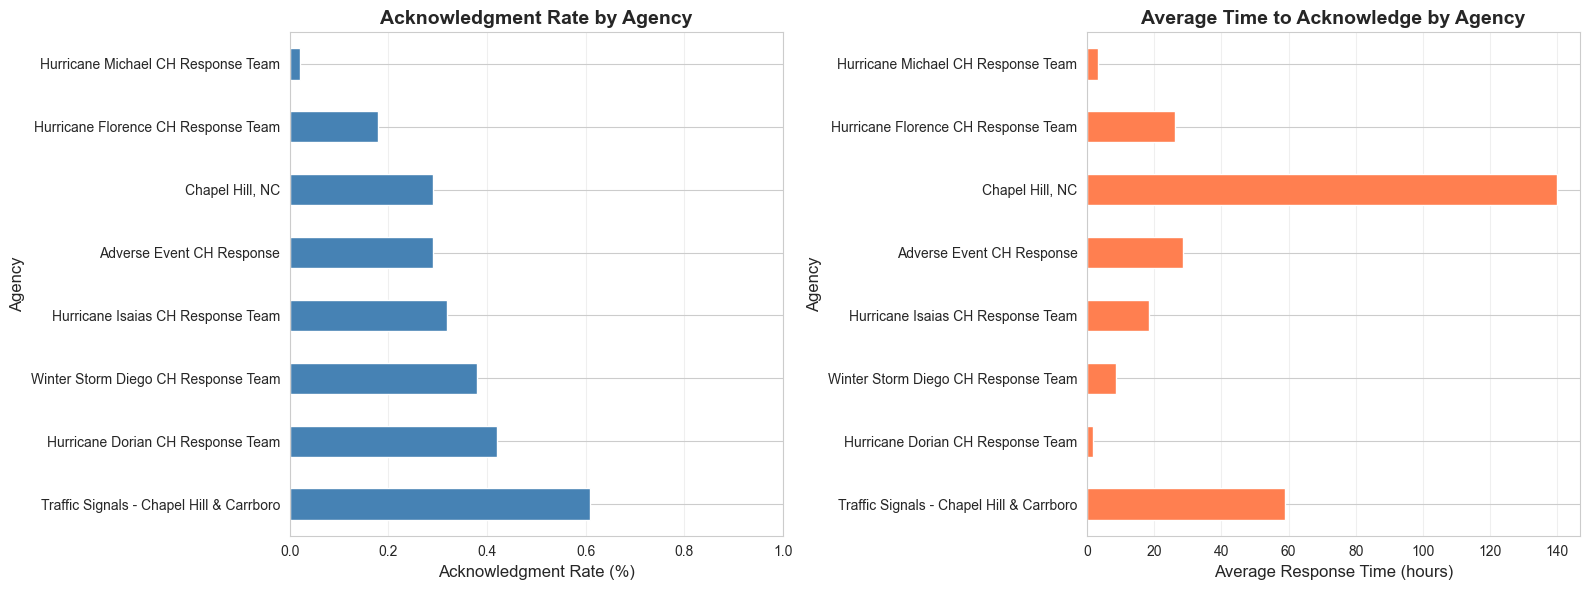


✓ Analysis complete!
  Total agencies analyzed: 8
  Best acknowledgment rate: 61.00%
  Fastest average response: 1.9 hours


In [12]:
# Agency Responsiveness Analysis
print("=" * 80)
print("AGENCY RESPONSIVENESS ANALYSIS")
print("=" * 80)

# Parse timestamps
df_seeclickfix_clean['created_at'] = pd.to_datetime(df_seeclickfix_clean['created_at'], errors='coerce')
df_seeclickfix_clean['acknowledged_at'] = pd.to_datetime(df_seeclickfix_clean['acknowledged_at'], errors='coerce')
df_seeclickfix_clean['closed_at'] = pd.to_datetime(df_seeclickfix_clean['closed_at'], errors='coerce')

# Create derived features
df_seeclickfix_clean['was_acknowledged'] = df_seeclickfix_clean['acknowledged_at'].notna()
df_seeclickfix_clean['time_to_acknowledge_hours'] = (
    df_seeclickfix_clean['acknowledged_at'] - df_seeclickfix_clean['created_at']
).dt.total_seconds() / 3600

# Calculate agency responsiveness metrics
agency_stats = df_seeclickfix_clean.groupby('agency').agg({
    'was_acknowledged': ['count', 'sum', 'mean'],
    'time_to_acknowledge_hours': ['mean', 'median']
}).round(2)

agency_stats.columns = ['total_issues', 'acknowledged_count', 'acknowledgment_rate', 
                        'avg_response_hours', 'median_response_hours']
agency_stats = agency_stats.sort_values('acknowledgment_rate', ascending=False)

# Filter agencies with at least 10 issues
agency_stats_filtered = agency_stats[agency_stats['total_issues'] >= 10]

print(f"\nAgency Responsiveness Summary (agencies with ≥10 issues):")
print(agency_stats_filtered)

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Acknowledgment Rate by Agency
ax1 = axes[0]
agency_stats_filtered['acknowledgment_rate'].plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Acknowledgment Rate (%)', fontsize=12)
ax1.set_ylabel('Agency', fontsize=12)
ax1.set_title('Acknowledgment Rate by Agency', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Average Response Time by Agency (only for acknowledged issues)
ax2 = axes[1]
agency_with_ack = agency_stats_filtered[agency_stats_filtered['acknowledged_count'] > 0]
agency_with_ack['avg_response_hours'].plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Average Response Time (hours)', fontsize=12)
ax2.set_ylabel('Agency', fontsize=12)
ax2.set_title('Average Time to Acknowledge by Agency', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Analysis complete!")
print(f"  Total agencies analyzed: {len(agency_stats_filtered)}")
print(f"  Best acknowledgment rate: {agency_stats_filtered['acknowledgment_rate'].max():.2%}")
print(f"  Fastest average response: {agency_with_ack['avg_response_hours'].min():.1f} hours")

### 3.2 WebCrowd Crowd Judgements EDA

In [13]:
df_crowd.head(3)

,wid,feedback,url,mapping,label,start,tid,design,rationale,duration,did,ID
0,wid#0,{},http://ir.ischool.utexas.edu/relevance/clueweb12/clueweb12-0401wb-51-01278.html,rlt3AvBHSs,1.0,Mon Apr 24 10:16:08 PDT 2017,267.0,NIST,Jaci Velasquez lyrics,298.0,clueweb12-0401wb-51-01278,0
1,wid#1,good,http://ir.ischool.utexas.edu/relevance/clueweb12/clueweb12-0401wb-51-01278.html,4qaUWlHcqH,0.0,Mon Apr 24 09:57:44 PDT 2017,267.0,NIST,Jaci Velasquez lyrics\n\nSort by album · Sort by song title\n\nBeauty Has Grace\n\nI'm Not Loo...,54.0,clueweb12-0401wb-51-01278,1
2,wid#2,{},http://ir.ischool.utexas.edu/relevance/clueweb12/clueweb12-0401wb-51-01278.html,rn12FoCKPi,0.0,Mon Apr 24 10:11:02 PDT 2017,267.0,NIST,He's My Savior lyrics,58.0,clueweb12-0401wb-51-01278,2


In [14]:
print("=" * 80)
print("WEBCROWD CROWD JUDGEMENTS - BASIC STATISTICS")
print("=" * 80)

print(f"\nDataset Shape: {df_crowd.shape}")
print(f"\nData Types:\n{df_crowd.dtypes}")
print(f"\nMissing Values:\n{df_crowd.isnull().sum().sort_values(ascending=False)}")
print(f"\nMissing Percentage:\n{(df_crowd.isnull().sum() / len(df_crowd) * 100).round(2).sort_values(ascending=False)}")

# Check for duplicates
print(f"\nDuplicate rows (all columns): {df_crowd.duplicated().sum()}")
if 'ID' in df_crowd.columns:
    print(f"Duplicate IDs: {df_crowd['ID'].duplicated().sum()}")

WEBCROWD CROWD JUDGEMENTS - BASIC STATISTICS

Dataset Shape: (25119, 12)

Data Types:
wid           object
feedback      object
url           object
mapping       object
label        float64
start         object
tid          float64
design        object
rationale     object
duration     float64
did           object
ID            object
dtype: object

Missing Values:
feedback     30
label        19
rationale    19
design       18
mapping      15
url          13
tid          13
did          11
duration     11
start         8
ID            4
wid           0
dtype: int64

Missing Percentage:
feedback     0.12
label        0.08
rationale    0.08
design       0.07
mapping      0.06
url          0.05
tid          0.05
did          0.04
duration     0.04
start        0.03
ID           0.02
wid          0.00
dtype: float64

Duplicate rows (all columns): 3
Duplicate IDs: 3


In [15]:
# Label distribution (including -1 which means no response)
print("\n" + "=" * 80)
print("LABEL DISTRIBUTION")
print("=" * 80)

if 'label' in df_crowd.columns:
    label_counts = df_crowd['label'].value_counts().sort_index()
    print(f"\nLabel Distribution:\n{label_counts}")
    print(f"\nLabel Meanings:")
    print("  -1: No response (should be ignored)")
    print("   0: Definitely Not Relevant")
    print("   1: Probably Not Relevant")
    print("   2: Probably Relevant")
    print("   3: Definitely Relevant")
    
    print(f"\nRows with label == -1: {(df_crowd['label'] == -1).sum()} ({(df_crowd['label'] == -1).sum() / len(df_crowd) * 100:.2f}%)")
    print(f"Valid labels (0-3): {(df_crowd['label'].isin([0,1,2,3])).sum()}")


LABEL DISTRIBUTION

Label Distribution:
label
-1.0     502
 0.0    5634
 1.0    5565
 2.0    8623
 3.0    4776
Name: count, dtype: int64

Label Meanings:
  -1: No response (should be ignored)
   0: Definitely Not Relevant
   1: Probably Not Relevant
   2: Probably Relevant
   3: Definitely Relevant

Rows with label == -1: 502 (2.00%)
Valid labels (0-3): 24598


In [16]:
# Duration analysis
print("\n" + "=" * 80)
print("DURATION ANALYSIS")
print("=" * 80)

if 'duration' in df_crowd.columns:
    duration_stats = df_crowd['duration'].describe()
    print(f"\nDuration Statistics (seconds):\n{duration_stats}")
    
    # Identify potential outliers
    Q1 = df_crowd['duration'].quantile(0.25)
    Q3 = df_crowd['duration'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_crowd[(df_crowd['duration'] < lower_bound) | (df_crowd['duration'] > upper_bound)]
    print(f"\nPotential outliers (IQR method): {len(outliers)} ({len(outliers)/len(df_crowd)*100:.2f}%)")
    print(f"  Lower bound: {lower_bound:.2f} seconds")
    print(f"  Upper bound: {upper_bound:.2f} seconds")
    
    # Very fast responses (< 10 seconds) might indicate low effort
    very_fast = (df_crowd['duration'] < 10).sum()
    print(f"\nVery fast responses (< 10 seconds): {very_fast} ({very_fast/len(df_crowd)*100:.2f}%)")


DURATION ANALYSIS

Duration Statistics (seconds):
count    25108.000000
mean       269.743787
std        529.258349
min          2.000000
25%         27.000000
50%         57.000000
75%        157.000000
max       3591.000000
Name: duration, dtype: float64

Potential outliers (IQR method): 4583 (18.25%)
  Lower bound: -168.00 seconds
  Upper bound: 352.00 seconds

Very fast responses (< 10 seconds): 497 (1.98%)


In [17]:
# Coverage analysis: judgments per (topic, document) pair
print("\n" + "=" * 80)
print("COVERAGE ANALYSIS")
print("=" * 80)

if 'tid' in df_crowd.columns and 'did' in df_crowd.columns:
    # Count judgments per (tid, did) pair
    coverage = df_crowd.groupby(['tid', 'did']).size()
    print(f"\nJudgments per (topic, document) pair:")
    print(f"  Mean: {coverage.mean():.2f}")
    print(f"  Median: {coverage.median():.2f}")
    print(f"  Min: {coverage.min()}")
    print(f"  Max: {coverage.max()}")
    print(f"\nDistribution:\n{coverage.value_counts().sort_index()}")
    
    # Expected: 5 judgments per pair (50 topics × 100 docs × 5 workers = 25K)
    print(f"\nExpected: ~5 judgments per (tid, did) pair")
    print(f"Pairs with exactly 5 judgments: {(coverage == 5).sum()} ({(coverage == 5).sum() / len(coverage) * 100:.2f}%)")


COVERAGE ANALYSIS

Judgments per (topic, document) pair:
  Mean: 5.02
  Median: 5.00
  Min: 4
  Max: 7

Distribution:
4       2
5    4899
6      90
7       9
Name: count, dtype: int64

Expected: ~5 judgments per (tid, did) pair
Pairs with exactly 5 judgments: 4899 (97.98%)


In [18]:
# Worker activity analysis
print("\n" + "=" * 80)
print("WORKER ACTIVITY ANALYSIS")
print("=" * 80)

if 'wid' in df_crowd.columns:
    worker_activity = df_crowd['wid'].value_counts()
    print(f"\nTotal unique workers: {df_crowd['wid'].nunique()}")
    print(f"\nJudgments per worker:")
    print(f"  Mean: {worker_activity.mean():.2f}")
    print(f"  Median: {worker_activity.median():.2f}")
    print(f"  Min: {worker_activity.min()}")
    print(f"  Max: {worker_activity.max()}")
    
    print(f"\nTop 10 most active workers:")
    print(worker_activity.head(10))
    
    # Average duration per worker
    if 'duration' in df_crowd.columns:
        worker_avg_duration = df_crowd.groupby('wid')['duration'].mean().sort_values(ascending=False)
        print(f"\nAverage duration per worker (top 10):")
        print(worker_avg_duration.head(10))


WORKER ACTIVITY ANALYSIS

Total unique workers: 190

Judgments per worker:
  Mean: 132.21
  Median: 3.00
  Min: 1
  Max: 1795

Top 10 most active workers:
wid
wid#17    1795
wid#18    1752
wid#24    1559
wid#2     1548
wid#0     1495
wid#20    1159
wid#4     1036
wid#15    1010
wid#5      956
wid#19     919
Name: count, dtype: int64

Average duration per worker (top 10):
wid
wid#111    3462.000000
wid#110    2647.000000
wid#67     1811.000000
wid#101    1797.942446
wid#90     1391.636364
wid#59     1329.854545
wid#41     1272.518519
wid#86     1251.000000
wid#149    1177.000000
wid#71     1075.047619
Name: duration, dtype: float64


### 3.3 WebCrowd Gold Judgements EDA

In [19]:
print("=" * 80)
print("WEBCROWD GOLD JUDGEMENTS - BASIC STATISTICS")
print("=" * 80)

print(f"\nDataset Shape: {df_gold.shape}")
print(f"\nData Types:\n{df_gold.dtypes}")
print(f"\nMissing Values:\n{df_gold.isnull().sum()}")

# Gold label distribution
if 'gold_judgement' in df_gold.columns:
    gold_label_counts = df_gold['gold_judgement'].value_counts().sort_index()
    print(f"\nGold Label Distribution:\n{gold_label_counts}")
    print(f"\nGold Label Meanings:")
    print("  -2: Page does not appear useful; may be spam/junk")
    print("   0: Content does not provide useful information")
    print("   1: Content provides some information")
    print("   2: Content provides substantial information")
    print("   3: Page dedicated to topic; authoritative and comprehensive")
    print("   4: Home page of entity directly named by query")

# Coverage
print(f"\nUnique topics: {df_gold['topic_id'].nunique()}")
print(f"Unique documents: {df_gold['document_id'].nunique()}")
print(f"Unique (topic, document) pairs: {df_gold.groupby(['topic_id', 'document_id']).size().shape[0]}")

WEBCROWD GOLD JUDGEMENTS - BASIC STATISTICS

Dataset Shape: (14432, 3)

Data Types:
topic_id           int64
document_id       object
gold_judgement     int64
dtype: object

Missing Values:
topic_id          0
document_id       0
gold_judgement    0
dtype: int64

Gold Label Distribution:
gold_judgement
-2     556
 0    8211
 1    3788
 2    1614
 3     230
 4      33
Name: count, dtype: int64

Gold Label Meanings:
  -2: Page does not appear useful; may be spam/junk
   0: Content does not provide useful information
   1: Content provides some information
   2: Content provides substantial information
   3: Page dedicated to topic; authoritative and comprehensive
   4: Home page of entity directly named by query

Unique topics: 50
Unique documents: 14429
Unique (topic, document) pairs: 14432


### 3.4 Join Crowd and Gold Judgements

In [20]:
# Clean WebCrowd Crowd Judgements
print("=" * 80)
print("CLEANING WEBCROWD CROWD JUDGEMENTS")
print("=" * 80)

df_crowd_clean = df_crowd.copy()

# Drop rows with label == -1 (no response)
initial_count = len(df_crowd_clean)
df_crowd_clean = df_crowd_clean[df_crowd_clean['label'] != -1].copy()
dropped_count = initial_count - len(df_crowd_clean)
print(f"\n✓ Dropped {dropped_count} rows with label == -1 (no response)")
print(f"  Remaining rows: {len(df_crowd_clean):,}")

# Drop url column (not needed)
if 'url' in df_crowd_clean.columns:
    df_crowd_clean = df_crowd_clean.drop(columns=['url'])
    print(f"✓ Dropped 'url' column")

# Ensure proper data types
df_crowd_clean['tid'] = df_crowd_clean['tid'].astype('Int64')  # Nullable integer
df_crowd_clean['label'] = df_crowd_clean['label'].astype('Int64')
df_crowd_clean['duration'] = pd.to_numeric(df_crowd_clean['duration'], errors='coerce')

print(f"\n✓ Cleaned dataset shape: {df_crowd_clean.shape}")
print(f"  Columns: {list(df_crowd_clean.columns)}")

CLEANING WEBCROWD CROWD JUDGEMENTS

✓ Dropped 502 rows with label == -1 (no response)
  Remaining rows: 24,617
✓ Dropped 'url' column

✓ Cleaned dataset shape: (24617, 11)
  Columns: ['wid', 'feedback', 'mapping', 'label', 'start', 'tid', 'design', 'rationale', 'duration', 'did', 'ID']


Cell 2: Join with Gold Judgements

In [21]:
# Join Crowd Judgements with Gold Judgements
print("=" * 80)
print("JOINING CROWD AND GOLD JUDGEMENTS")
print("=" * 80)

# Explanation of the join:
# - Crowd has: tid (topic_id) and did (document_id)
# - Gold has: topic_id and document_id
# - We join on: (tid, did) = (topic_id, document_id)
# - This matches each worker judgment with its corresponding expert/gold label

print("\nJoin Strategy:")
print("  Crowd columns: tid (topic_id) + did (document_id)")
print("  Gold columns: topic_id + document_id")
print("  Join on: (tid, did) = (topic_id, document_id)")

# Prepare gold dataframe with matching column names
df_gold_join = df_gold.rename(columns={
    'topic_id': 'tid',
    'document_id': 'did'
})

# Perform left join (keep all crowd judgments, add gold where available)
df_joined = df_crowd_clean.merge(
    df_gold_join[['tid', 'did', 'gold_judgement']],
    on=['tid', 'did'],
    how='left'
)

print(f"\n✓ Join complete!")
print(f"  Crowd judgments: {len(df_crowd_clean):,}")
print(f"  Joined dataset: {len(df_joined):,}")
print(f"  Judgments with gold labels: {df_joined['gold_judgement'].notna().sum():,} ({df_joined['gold_judgement'].notna().sum()/len(df_joined)*100:.1f}%)")
print(f"  Judgments without gold labels: {df_joined['gold_judgement'].isna().sum():,} ({df_joined['gold_judgement'].isna().sum()/len(df_joined)*100:.1f}%)")

print(f"\nJoined dataset columns: {list(df_joined.columns)}")
df_joined.head(3)

JOINING CROWD AND GOLD JUDGEMENTS

Join Strategy:
  Crowd columns: tid (topic_id) + did (document_id)
  Gold columns: topic_id + document_id
  Join on: (tid, did) = (topic_id, document_id)

✓ Join complete!
  Crowd judgments: 24,617
  Joined dataset: 24,617
  Judgments with gold labels: 24,604 (99.9%)
  Judgments without gold labels: 13 (0.1%)

Joined dataset columns: ['wid', 'feedback', 'mapping', 'label', 'start', 'tid', 'design', 'rationale', 'duration', 'did', 'ID', 'gold_judgement']


,wid,feedback,mapping,label,start,tid,design,rationale,duration,did,ID,gold_judgement
0,wid#0,{},rlt3AvBHSs,1,Mon Apr 24 10:16:08 PDT 2017,267,NIST,Jaci Velasquez lyrics,298.0,clueweb12-0401wb-51-01278,0,1.0
1,wid#1,good,4qaUWlHcqH,0,Mon Apr 24 09:57:44 PDT 2017,267,NIST,Jaci Velasquez lyrics\n\nSort by album · Sort by song title\n\nBeauty Has Grace\n\nI'm Not Loo...,54.0,clueweb12-0401wb-51-01278,1,1.0
2,wid#2,{},rn12FoCKPi,0,Mon Apr 24 10:11:02 PDT 2017,267,NIST,He's My Savior lyrics,58.0,clueweb12-0401wb-51-01278,2,1.0


Worker Trustworthiness Metrics


In [24]:
# Worker Trustworthiness Metrics (Step 2)
#
# We compute trustworthiness at worker level (wid) using four groups of signals:
# 1) Accuracy vs gold (expert/NIST)  -> validity
# 2) Consistency vs majority vote   -> peer reliability
# 3) Behavior indicators            -> effort/quality proxies (duration, rationale)
# 4) Stability across tasks/time    -> consistency of performance
#
# Assumptions:
# - df_joined exists and contains: wid, tid, did, label (0..3), gold_judgement (-2..4), duration, rationale, start

print("=" * 80)
print("WORKER TRUSTWORTHINESS METRICS")
print("=" * 80)

required_cols = {'wid', 'tid', 'did', 'label', 'gold_judgement'}
missing = required_cols - set(df_joined.columns)
if missing:
    raise ValueError(f"df_joined is missing required columns: {missing}")

# -----------------------------------------------------------------------------
# A) Make gold comparable to crowd labels
# -----------------------------------------------------------------------------
# Crowd labels: 0..3 (def not rel .. def rel)
# Gold labels:  {-2, 0, 1, 2, 3, 4}
# Mapping M1 (ordinal 0..3) — simple + commonly used:
#   -2,0 -> 0   (spam/junk OR not useful)
#   1    -> 1   (some info)
#   2    -> 2   (substantial)
#   3,4  -> 3   (authoritative OR homepage)

def map_gold_to_crowd_m1(g):
    mapping = {-2: 0, 0: 0, 1: 1, 2: 2, 3: 3, 4: 3}
    return mapping.get(g, pd.NA)

# Mapping M2 (binary relevance) — robustness check:
#   gold in {-2,0,1} -> 0 (nonrelevant)
#   gold in {2,3,4}  -> 1 (relevant)
#   crowd {0,1} -> 0, crowd {2,3} -> 1

def gold_to_binary(g):
    if pd.isna(g):
        return pd.NA
    return 1 if int(g) in (2, 3, 4) else 0

def crowd_to_binary(lbl):
    if pd.isna(lbl):
        return pd.NA
    return 1 if int(lbl) in (2, 3) else 0

# Work on a copy so we don't accidentally overwrite earlier steps
w = df_joined.copy()

# Ensure numeric types where possible
w['label'] = w['label'].astype('Int64')
# gold_judgement may be float because of NaNs from join; keep numeric
w['gold_judgement'] = pd.to_numeric(w['gold_judgement'], errors='coerce')

w['gold_m1'] = w['gold_judgement'].apply(map_gold_to_crowd_m1).astype('Int64')
w['gold_bin'] = w['gold_judgement'].apply(gold_to_binary).astype('Int64')
w['crowd_bin'] = w['label'].apply(crowd_to_binary).astype('Int64')

# -----------------------------------------------------------------------------
# B) Majority vote per (tid, did) + tie handling
# -----------------------------------------------------------------------------
# For each item (tid,did), compute:
# - n_judgments
# - majority label (mode)
# - tie flag (more than 1 mode)
#
# IMPORTANT:
# Using groupby().apply() that returns a Series creates a 3-level MultiIndex
# (tid, did, field_name). If we try to .join() that directly, pandas can raise:
#   AssertionError: Length of order must be same as number of levels...
# So we explicitly reshape the apply result into columns via .unstack().

def majority_and_tie(x: pd.Series):
    m = x.mode(dropna=True)
    if len(m) == 0:
        return pd.Series({'majority_label': pd.NA, 'is_tie': True})
    if len(m) == 1:
        return pd.Series({'majority_label': int(m.iloc[0]), 'is_tie': False})
    # Tie: we mark it and still choose a deterministic label (median of modes)
    return pd.Series({'majority_label': int(m.median()), 'is_tie': True})

# Build majority/tie as a 2-column DataFrame with index (tid, did)
maj = w.groupby(['tid', 'did'])['label'].apply(majority_and_tie).unstack()

item_stats = (
    w.groupby(['tid', 'did'])
     .agg(n_judgments=('label', 'size'))
     .join(maj)
     .reset_index()
)

w = w.merge(item_stats, on=['tid', 'did'], how='left')

# -----------------------------------------------------------------------------
# C) Row-level metrics (used later for worker aggregation)
# -----------------------------------------------------------------------------
# Gold-based metrics
w['gold_available'] = w['gold_m1'].notna()
w['acc_exact_m1'] = (w['label'] == w['gold_m1']).where(w['gold_available'], pd.NA)
w['abs_err_m1'] = (w['label'] - w['gold_m1']).abs().where(w['gold_available'], pd.NA)
w['within1_m1'] = (w['abs_err_m1'] <= 1).where(w['gold_available'], pd.NA)

w['acc_bin'] = (w['crowd_bin'] == w['gold_bin']).where(w['gold_bin'].notna() & w['crowd_bin'].notna(), pd.NA)

# Majority-based metrics (exclude ties by default)
non_tie = w['is_tie'] == False
w['maj_agree'] = (w['label'] == w['majority_label']).where(non_tie, pd.NA)
w['abs_dev_majority'] = (w['label'] - w['majority_label']).abs().where(non_tie, pd.NA)

# Behavior indicators
w['duration'] = pd.to_numeric(w.get('duration', pd.Series([pd.NA] * len(w))), errors='coerce')
# Very fast threshold (common low-effort heuristic)
w['is_very_fast'] = (w['duration'] < 10).where(w['duration'].notna(), False)
# Very slow: define relative threshold (95th percentile) on available durations
p95 = w['duration'].quantile(0.95) if w['duration'].notna().any() else np.nan
w['is_very_slow'] = (w['duration'] > p95).where(w['duration'].notna(), False)

# Rationale quality proxies
w['rationale'] = w.get('rationale', pd.Series([pd.NA] * len(w)))
# treat empty/whitespace as missing
w['rationale_clean'] = w['rationale'].fillna('').astype(str).str.strip()
w['rationale_empty'] = (w['rationale_clean'] == '')
w['rationale_len'] = w['rationale_clean'].str.len()

# -----------------------------------------------------------------------------
# D) Stability across tasks/time (simple)
# -----------------------------------------------------------------------------
# We want stability of *performance*, not stability of always choosing same label.
# We'll compute gold-accuracy in 3 sequential bins per worker.
# If start parsing fails, we fall back to the row order.

# Try parsing start; timezone abbreviations may not parse reliably on all systems
w['start_dt'] = pd.to_datetime(w.get('start', pd.Series([pd.NA] * len(w))), errors='coerce')

# Define an ordering key per worker
w['_order_key'] = w['start_dt']
if w['_order_key'].isna().all():
    # fallback: original row order
    w['_order_key'] = np.arange(len(w))

w = w.sort_values(['wid', '_order_key'])

# Bin index within each worker: 0,1,2 (approximately equal sized)
# If a worker has <3 rows, bins will collapse; we handle that.

def assign_bins(group):
    """Assign each row in a worker's sequence to 3 bins (0/1/2).

    NOTE: use labels=False to return plain integers (not Categorical),
    so downstream .astype('Int64') is safe.
    """
    n = len(group)
    if n < 3:
        # everyone in bin 0
        return pd.Series([0] * n, index=group.index)

    ranks = np.arange(n)

    # qcut into 3 bins by rank (returns 0/1/2 as integers)
    bins = pd.qcut(ranks, q=3, labels=False)
    return pd.Series(bins, index=group.index)

w['time_bin'] = w.groupby('wid', group_keys=False).apply(assign_bins).astype('Int64')

# bin-level accuracy (exact M1)
bin_acc = (
    w[w['gold_available']]
    .groupby(['wid', 'time_bin'])['acc_exact_m1']
    .mean()
    .reset_index()
    .rename(columns={'acc_exact_m1': 'bin_acc_exact_m1'})
)

# stability metrics per worker: std + min of bin accuracies
stability = (
    bin_acc.groupby('wid')['bin_acc_exact_m1']
    .agg(stability_std='std', stability_min='min')
    .reset_index()
)

# -----------------------------------------------------------------------------
# E) Aggregate to worker-level table
# -----------------------------------------------------------------------------
# Helper: most-common rationale share (simple repetition proxy)

def top_rationale_share(s: pd.Series) -> float:
    s = s.dropna().astype(str).str.strip()
    s = s[s != '']
    if len(s) == 0:
        return 0.0
    vc = s.value_counts(normalize=True)
    return float(vc.iloc[0])

worker_metrics = (
    w.groupby('wid')
     .agg(
        total_judgments=('label', 'size'),
        # gold-based
        gold_coverage=('gold_available', 'mean'),
        acc_exact_m1=('acc_exact_m1', 'mean'),
        within1_m1=('within1_m1', 'mean'),
        mae_m1=('abs_err_m1', 'mean'),
        acc_bin=('acc_bin', 'mean'),
        # majority-based (ties excluded via NA)
        majority_agreement=('maj_agree', 'mean'),
        mean_abs_dev_majority=('abs_dev_majority', 'mean'),
        # duration behavior
        duration_median=('duration', 'median'),
        duration_mean=('duration', 'mean'),
        very_fast_pct=('is_very_fast', 'mean'),
        very_slow_pct=('is_very_slow', 'mean'),
        # rationale behavior
        rationale_empty_pct=('rationale_empty', 'mean'),
        rationale_len_median=('rationale_len', 'median'),
        rationale_len_mean=('rationale_len', 'mean'),
        rationale_top1_share=('rationale_clean', top_rationale_share),
     )
     .reset_index()
)

# Add stability (may be NaN for workers without enough gold/time bins)
worker_metrics = worker_metrics.merge(stability, on='wid', how='left')

# Make percentages easier to read
for col in ['gold_coverage', 'acc_exact_m1', 'within1_m1', 'acc_bin', 'majority_agreement', 'very_fast_pct', 'very_slow_pct', 'rationale_empty_pct']:
    if col in worker_metrics.columns:
        worker_metrics[col] = (worker_metrics[col].astype(float) * 100).round(2)

print("\n✓ Built worker_metrics")
print(worker_metrics.head(10))

print("\nQuick sanity checks:")
print("  #workers:", worker_metrics['wid'].nunique())
print("  judgments range:", worker_metrics['total_judgments'].min(), "to", worker_metrics['total_judgments'].max())
print("  avg gold coverage (%):", worker_metrics['gold_coverage'].mean().round(2))


WORKER TRUSTWORTHINESS METRICS

✓ Built worker_metrics
       wid  total_judgments  gold_coverage  acc_exact_m1  within1_m1  \
0    wid#0             1486          100.0         40.65       86.81   
1    wid#1              384          100.0         19.53       62.24   
2   wid#10                8          100.0         50.00       75.00   
3  wid#100               30          100.0         16.67       53.33   
4  wid#101              139          100.0         19.42       54.68   
5  wid#102               22          100.0         27.27       54.55   
6  wid#103               98          100.0         33.67       77.55   
7  wid#104                3          100.0          0.00        0.00   
8  wid#105                2          100.0          0.00        0.00   
9  wid#106               29          100.0         27.59       58.62   

     mae_m1  acc_bin  majority_agreement mean_abs_dev_majority  \
0   0.74428    76.38               67.99              0.402202   
1  1.296875    45.05

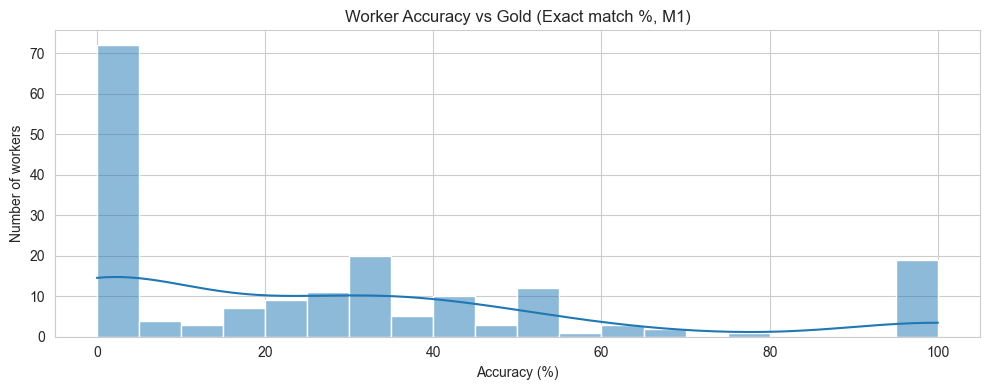

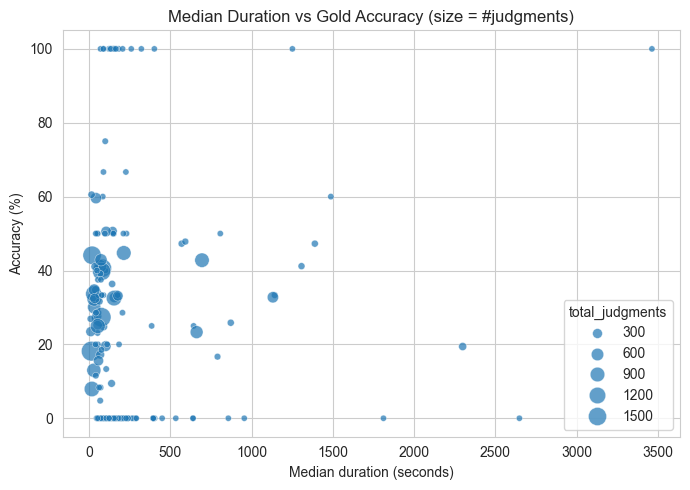

Top 10 workers by gold accuracy (min 20 judgments):
        wid  total_judgments  acc_exact_m1  within1_m1    mae_m1  \
180  wid#92               76         60.53       97.37  0.434211   
179  wid#91              443         59.59       96.61  0.440181   
125  wid#42              215         50.70       88.84  0.613953   
156  wid#70              356         50.56       89.33  0.603933   
121  wid#39               46         47.83       86.96  0.673913   
104  wid#23               55         47.27       90.91  0.636364   
143  wid#59               55         47.27       92.73       0.6   
144   wid#6              896         44.75       87.39  0.699777   
105  wid#24             1532         44.13       88.90  0.678198   
146  wid#61              569         42.88       88.93  0.683656   

     majority_agreement  duration_median  very_fast_pct  rationale_empty_pct  
180               76.92             16.0           2.63                 0.00  
179               78.38             43.0 

In [ ]:
# Simple visuals + top/bottom workers (interpretation helpers)

# 1) Distribution of accuracy vs gold (exact match, M1)
plt.figure(figsize=(10, 4))
sns.histplot(worker_metrics['acc_exact_m1'].dropna(), bins=20, kde=True)
plt.title('Worker Accuracy vs Gold (Exact match %, M1)')
plt.xlabel('Accuracy (%)')
plt.ylabel('Number of workers')
plt.tight_layout()
plt.show()

# 2) Relationship: speed vs accuracy (median duration vs accuracy)
# This can reveal suspicious patterns (e.g., extremely fast + low accuracy)
#
# IMPORTANT (pandas nullable dtypes):
# seaborn can error if the "size" column is pandas nullable Int64.
# We cast plotting columns to plain float to avoid:
#   TypeError: Cannot interpret 'Int64Dtype()' as a data type

plot_df = worker_metrics.copy()
plot_df['total_judgments'] = pd.to_numeric(plot_df['total_judgments'], errors='coerce').astype(float)
plot_df['duration_median'] = pd.to_numeric(plot_df['duration_median'], errors='coerce').astype(float)
plot_df['acc_exact_m1'] = pd.to_numeric(plot_df['acc_exact_m1'], errors='coerce').astype(float)

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=plot_df,
    x='duration_median',
    y='acc_exact_m1',
    size='total_judgments',
    sizes=(20, 200),
    alpha=0.7,
    legend='brief'
)
plt.title('Median Duration vs Gold Accuracy (size = #judgments)')
plt.xlabel('Median duration (seconds)')
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

# 3) Show top/bottom workers (by gold accuracy) with a minimum activity filter
min_j = 20
rankable = worker_metrics[worker_metrics['total_judgments'] >= min_j].copy()
rankable = rankable.sort_values('acc_exact_m1', ascending=False)

print(f"Top 10 workers by gold accuracy (min {min_j} judgments):")
print(rankable[['wid','total_judgments','acc_exact_m1','within1_m1','mae_m1','majority_agreement','duration_median','very_fast_pct','rationale_empty_pct']].head(10))

print(f"\nBottom 10 workers by gold accuracy (min {min_j} judgments):")
print(rankable[['wid','total_judgments','acc_exact_m1','within1_m1','mae_m1','majority_agreement','duration_median','very_fast_pct','rationale_empty_pct']].tail(10))

# Optional: Save worker_metrics for later modeling
# worker_metrics.to_csv('worker_metrics.csv', index=False)


Using MIN_J=20 judgments
X threshold (within1_m1) @P50: 78.00
Y threshold (majority_agreement) @P50: 66.62

Quadrant counts:
trust_quadrant
Q1: HighGold-HighConsensus (Reliable)               17
Q4: LowGold-LowConsensus (Unreliable/noisy)         17
Q3: LowGold-HighConsensus (Conforming-but-wrong)    10
Q2: HighGold-LowConsensus (Expert-like outlier)     10
Name: count, dtype: int64


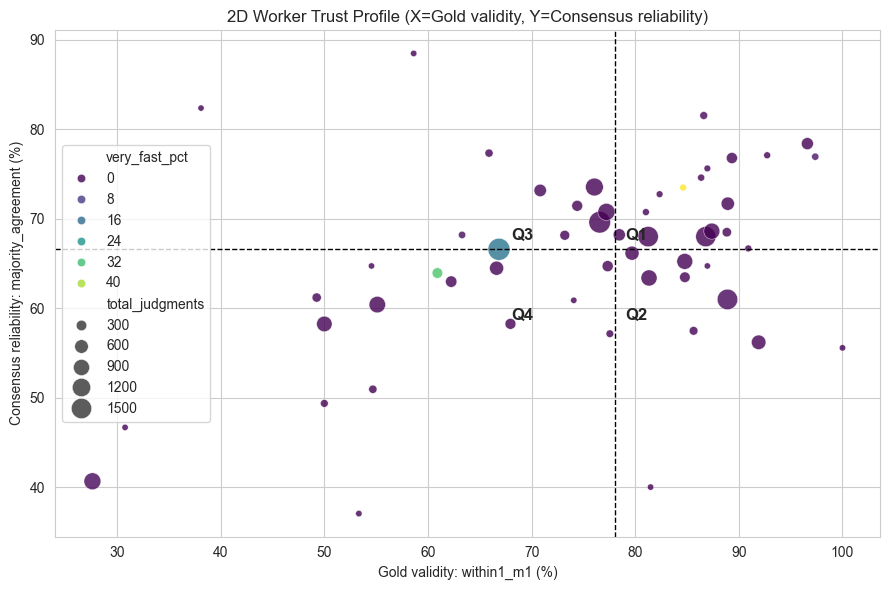


Examples (top 5 by within1_m1) per quadrant:

Q1: HighGold-HighConsensus (Reliable)
        wid  total_judgments  within1_m1  majority_agreement  acc_exact_m1  \
180  wid#92             76.0       97.37               76.92         60.53   
179  wid#91            443.0       96.61               78.38         59.59   
143  wid#59             55.0       92.73               77.08         47.27   
104  wid#23             55.0       90.91               66.67         47.27   
156  wid#70            356.0       89.33               76.77         50.56   

       mae_m1  very_fast_pct  duration_median  
180  0.434211           2.63             16.0  
179  0.440181           0.00             43.0  
143       0.6           0.00           1389.0  
104  0.636364           0.00            570.0  
156  0.603933           0.00            105.5  

Q4: LowGold-LowConsensus (Unreliable/noisy)
         wid  total_judgments  within1_m1  majority_agreement  acc_exact_m1  \
6    wid#103             98.0     

In [27]:
# 2D Trust Profile (Option A)
# X = within1_m1 (gold validity, tolerant to ±1)
# Y = majority_agreement (peer/consensus reliability)
# Point size = total_judgments (how much evidence we have per worker)
# Color = very_fast_pct (potential low-effort risk)

# Prepare plotting dataframe with safe numeric dtypes
prof = worker_metrics.copy()
for col in ['within1_m1', 'majority_agreement', 'total_judgments', 'very_fast_pct']:
    prof[col] = pd.to_numeric(prof[col], errors='coerce').astype(float)

# Optional: focus on workers with enough activity so the profile is meaningful
MIN_J = 20
prof_f = prof[prof['total_judgments'] >= MIN_J].copy()

# Thresholds: percentile-based (robust, thesis-friendly)
# You can change q to 50 (median split) or 60/40 for stricter separation.
qx = 50  # within1_m1 threshold percentile
qy = 50  # majority_agreement threshold percentile

x_thr = np.nanpercentile(prof_f['within1_m1'], qx)
y_thr = np.nanpercentile(prof_f['majority_agreement'], qy)

print(f"Using MIN_J={MIN_J} judgments")
print(f"X threshold (within1_m1) @P{qx}: {x_thr:.2f}")
print(f"Y threshold (majority_agreement) @P{qy}: {y_thr:.2f}")

# Assign quadrants (4 archetypes)
# Q1: High gold, high consensus
# Q2: High gold, low consensus
# Q3: Low gold, high consensus
# Q4: Low gold, low consensus

def quadrant(row):
    x = row['within1_m1']
    y = row['majority_agreement']
    if pd.isna(x) or pd.isna(y):
        return 'unknown'
    high_gold = x >= x_thr
    high_cons = y >= y_thr
    if high_gold and high_cons:
        return 'Q1: HighGold-HighConsensus (Reliable)'
    if high_gold and not high_cons:
        return 'Q2: HighGold-LowConsensus (Expert-like outlier)'
    if (not high_gold) and high_cons:
        return 'Q3: LowGold-HighConsensus (Conforming-but-wrong)'
    return 'Q4: LowGold-LowConsensus (Unreliable/noisy)'

prof_f['trust_quadrant'] = prof_f.apply(quadrant, axis=1)

# Summary counts
print("\nQuadrant counts:")
print(prof_f['trust_quadrant'].value_counts())

# Plot
plt.figure(figsize=(9, 6))
ax = sns.scatterplot(
    data=prof_f,
    x='within1_m1',
    y='majority_agreement',
    size='total_judgments',
    sizes=(20, 250),
    hue='very_fast_pct',
    palette='viridis',
    alpha=0.8,
    legend='brief'
)

# Quadrant lines
plt.axvline(x_thr, color='black', linestyle='--', linewidth=1)
plt.axhline(y_thr, color='black', linestyle='--', linewidth=1)

plt.title('2D Worker Trust Profile (X=Gold validity, Y=Consensus reliability)')
plt.xlabel('Gold validity: within1_m1 (%)')
plt.ylabel('Consensus reliability: majority_agreement (%)')

# Annotate quadrant labels (simple)
plt.text(x_thr + 1, y_thr + 1, 'Q1', fontsize=12, fontweight='bold')
plt.text(x_thr + 1, y_thr - 8, 'Q2', fontsize=12, fontweight='bold')
plt.text(x_thr - 10, y_thr + 1, 'Q3', fontsize=12, fontweight='bold')
plt.text(x_thr - 10, y_thr - 8, 'Q4', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Show top examples from each quadrant (by gold validity)
print("\nExamples (top 5 by within1_m1) per quadrant:")
for q in prof_f['trust_quadrant'].value_counts().index:
    ex = prof_f[prof_f['trust_quadrant'] == q].sort_values('within1_m1', ascending=False)
    print(f"\n{q}")
    print(ex[['wid','total_judgments','within1_m1','majority_agreement','acc_exact_m1','mae_m1','very_fast_pct','duration_median']].head(5))
